# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls=pd.read_csv("./Dataset/megaline_calls.csv")
internet=pd.read_csv("./Dataset/megaline_internet.csv")
messages=pd.read_csv("./Dataset/megaline_messages.csv")
users=pd.read_csv("./Dataset/megaline_users.csv")
plans=pd.read_csv("./Dataset/megaline_plans.csv")

## Preparar los datos

## Tarifas

In [3]:
print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


In [4]:
## tener en cuenta los pagos de mg y gb
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [6]:
plans.isnull()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False


In [7]:
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

existen 8 columnas y dos entradas (planes) "ultimate" y "susf" en pirmera instancia no aparecen datos nulos pero verificamos con isnull para saber si no los hay o si existen datos nulos, con lo cual confimamos que no existen

In [8]:
plans.duplicated().sum()

0

Con el metodo duplicated podemos confirmar que no hay datos duplicados

## Corregir datos

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
plans.rename(columns={"plan_name":"plan_id"},inplace=True)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_id
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Usuarios/as

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [12]:
users.duplicated().sum()

0

### Corregir los datos

In [13]:
users["reg_date"] = pd.to_datetime(users["reg_date"], format="%Y-%m-%d")
users["reg_mes"] = pd.DatetimeIndex(users["reg_date"]).month

In [14]:
users["churn_date"] = pd.to_datetime(users["churn_date"], format="%Y-%m-%d")
users["churn_mes"] = pd.DatetimeIndex(users["churn_date"]).month

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mes     500 non-null    int32         
 9   churn_mes   34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(4)
memory usage: 37.2+ KB


In [16]:
users.describe()

,user_id,age,reg_date,churn_date,reg_mes,churn_mes
count,500.000000,500.000000,500,34,500.000000,34.000000
mean,1249.500000,45.486000,2018-06-24 16:30:43.200000,2018-11-10 22:35:17.647058944,6.290000,10.764706
min,1000.000000,18.000000,2018-01-01 00:00:00,2018-07-31 00:00:00,1.000000,7.000000
25%,1124.750000,30.000000,2018-03-25 18:00:00,2018-10-08 12:00:00,3.000000,10.000000
50%,1249.500000,46.000000,2018-06-20 00:00:00,2018-11-22 12:00:00,6.000000,11.000000
75%,1374.250000,61.000000,2018-09-20 06:00:00,2018-12-18 00:00:00,9.000000,12.000000
max,1499.000000,75.000000,2018-12-31 00:00:00,2018-12-31 00:00:00,12.000000,12.000000
std,144.481833,16.972269,NaN,NaN,3.438247,1.415473


In [17]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
reg_mes         0
churn_mes     466
dtype: int64

Con el metodo isnull.sum encontramos que existen valores nulos (NANS)  466 el la columna churn_date y chur_mes que mas adelnate corregire

### Enriquecer los datos

In [18]:
users.rename(columns={"plan":"plan_id"},inplace=True)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan_id,churn_date,reg_mes,churn_mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_id     500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mes     500 non-null    int32         
 9   churn_mes   34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(4)
memory usage: 37.2+ KB


Al enriquecer los datos existen aun datos NAN pero estos son correctos ya que podria ser que son aun los suscritores aun suscritos y es por eso que esto esta bien


## Llamadas

In [20]:
calls.head()
calls.rename(columns={"id":"calls_id"},inplace=True)

In [21]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   calls_id   137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


los datos parecen consistentes y no existen valores nulos o ausentes

In [22]:
calls.isna().sum()

calls_id     0
user_id      0
call_date    0
duration     0
dtype: int64

In [23]:
calls.duplicated(subset=["calls_id", "user_id"]).sum()

0

In [24]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


los datos parecen consistentes y no existen valores nulos o ausentes, sin embargo la columna call_date es object y deberia ser fecha

### Corregir los datos

In [25]:
#se debe cambiar el formato fecha
calls["call_date"]= pd.to_datetime(calls["call_date"], format="%Y-%m-%d")

In [26]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   calls_id   137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [27]:
calls.head()

,calls_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enriquecer los datos

In [28]:
calls["mes"]= pd.DatetimeIndex(calls["call_date"]).month
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   calls_id   137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   mes        137735 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 4.7+ MB


,calls_id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [29]:
!pip install numpy

import numpy as np

def redondeo_calls(duracion):
    redonde = np.ceil(duracion)
    return redonde

In [30]:
calls['duracion_redondeo'] = calls['duration'].apply(redondeo_calls)

In [31]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   calls_id           137735 non-null  object        
 1   user_id            137735 non-null  int64         
 2   call_date          137735 non-null  datetime64[ns]
 3   duration           137735 non-null  float64       
 4   mes                137735 non-null  int32         
 5   duracion_redondeo  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 5.8+ MB


In [32]:
calls.head()

,calls_id,user_id,call_date,duration,mes,duracion_redondeo
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


In [33]:
calls.duplicated().sum()

0

Para call existen 4 columnas con 137734 filas las cuales no hay valores duplicados y se a relizado el redonde de la duracion de las llamadas ya que por algun decimanl que arrebase el plan, este se cobrara como el subsecuente


In [34]:
calls_analytics = calls.pivot_table(
    index=["user_id", "mes"],
    values='duracion_redondeo',
    aggfunc={'duracion_redondeo': ['sum', 'count']}
)

In [35]:
calls_analytics.head(10)

count     sum
user_id mes               
1000    12      16   124.0
1001    8       27   182.0
        9       49   315.0
        10      65   393.0
        11      64   426.0
        12      56   412.0
1002    10      11    59.0
        11      55   386.0
        12      47   384.0
1003    12     149  1104.0

In [36]:
calls_analytics.columns = ["minutos_usados", "llamadas_hechas"]
print(calls_analytics.head())

             minutos_usados  llamadas_hechas
user_id mes                                 
1000    12               16            124.0
1001    8                27            182.0
        9                49            315.0
        10               65            393.0
        11               64            426.0


In [37]:
calls_analytics=calls_analytics.reset_index()

In [38]:
print(calls_analytics)

      user_id  mes  minutos_usados  llamadas_hechas
0        1000   12              16            124.0
1        1001    8              27            182.0
2        1001    9              49            315.0
3        1001   10              65            393.0
4        1001   11              64            426.0
...       ...  ...             ...              ...
2253     1498   12              39            339.0
2254     1499    9              41            346.0
2255     1499   10              53            385.0
2256     1499   11              45            308.0
2257     1499   12              65            496.0

[2258 rows x 4 columns]


Unimos minutos_usados y llamadas_usadas ya que estos datos no daran un mejor entendimiento del uso del plan por usuario y este se agrega mensualmente como se realizo en los otros datos para tener una fecha exata de tiempo


## Mensajes

In [39]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())
print(messages.head())
messages.rename(columns={"id":"messages_id"},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [40]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [41]:
print(messages.duplicated(subset=["messages_id", "user_id"]).sum())
print(messages.duplicated(subset=["messages_id"]).sum())

0
0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Para el data frame de mensajes existen 4 columnas con 76051 filas de las cuales no se encontraron valores nulos asi cmo duplicados en el caso de describe podemos conlcuir que los mesajes minumos por usurios es de 1000 por mes mientras que la cantidad maxima por mensajes es de 1497 por mes

### Corregir los datos

In [42]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format="%Y-%m-%d")
messages["mes"] = pd.DatetimeIndex(messages["message_date"]).month

print(messages.info())
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   messages_id   76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   mes           76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB
None
  messages_id  user_id message_date  mes
0    1000_125     1000   2018-12-27   12
1    1000_160     1000   2018-12-31   12
2    1000_223     1000   2018-12-31   12
3    1000_251     1000   2018-12-27   12
4    1000_255     1000   2018-12-26   12


In [43]:
print(messages.duplicated(subset=["user_id","message_date"]).sum())
print(messages.duplicated().sum())

42808
0


### Enriquecer los datos

## Internet

In [44]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
internet.rename(columns={"id":"internets_id"},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [45]:
print(internet.head())
print(internet.isnull().sum())
print(internet.duplicated(subset=["internets_id", "user_id"]).sum())

  internets_id  user_id session_date  mb_used
0      1000_13     1000   2018-12-29    89.86
1     1000_204     1000   2018-12-31     0.00
2     1000_379     1000   2018-12-28   660.40
3     1000_413     1000   2018-12-26   270.99
4     1000_442     1000   2018-12-27   880.22
internets_id    0
user_id         0
session_date    0
mb_used         0
dtype: int64
0


In [46]:
internet["session_date"]= pd.to_datetime(internet["session_date"], format="%Y-%m-%d")
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   internets_id  104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Para estos datos existen 6 columnas con 104824 filas de las cuales concluimos para este caso que nohay datos nulos ni duplicados por lo cual ya podemos trabajar  con este data frame


### Corregir los datos

In [47]:
#se debe cambiar el formato fecha
internet["internet_date"]= pd.to_datetime(internet["session_date"], format="%Y-%m-%d")
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   internets_id   104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   internet_date  104825 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 4.0+ MB


### Enriquecer los datos

In [48]:
internet["mes"]= pd.DatetimeIndex(internet["session_date"]).month
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   internets_id   104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   internet_date  104825 non-null  datetime64[ns]
 5   mes            104825 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(1)
memory usage: 4.4+ MB


,internets_id,user_id,session_date,mb_used,internet_date,mes
0,1000_13,1000,2018-12-29,89.86,2018-12-29,12
1,1000_204,1000,2018-12-31,0.00,2018-12-31,12
2,1000_379,1000,2018-12-28,660.40,2018-12-28,12
3,1000_413,1000,2018-12-26,270.99,2018-12-26,12
4,1000_442,1000,2018-12-27,880.22,2018-12-27,12


In [49]:
internet.describe()

,user_id,session_date,mb_used,internet_date,mes
count,104825.000000,104825,104825.000000,104825,104825.000000
mean,1242.496361,2018-09-26 11:37:55.048890880,366.713701,2018-09-26 11:37:55.048890880,9.342552
min,1000.000000,2018-01-15 00:00:00,0.000000,2018-01-15 00:00:00,1.000000
25%,1122.000000,2018-08-11 00:00:00,136.080000,2018-08-11 00:00:00,8.000000
50%,1236.000000,2018-10-13 00:00:00,343.980000,2018-10-13 00:00:00,10.000000
75%,1367.000000,2018-11-27 00:00:00,554.610000,2018-11-27 00:00:00,11.000000
max,1499.000000,2018-12-31 00:00:00,1693.470000,2018-12-31 00:00:00,12.000000
std,142.053913,NaN,277.170542,NaN,2.400404


In [50]:
#la cantidad minima de los usuarios con respecto a los mb es cero, queremos saber por que
#query lo usamos para filtar
print(internet.query("mb_used==0"))
print()
print(len(internet.query("mb_used==0"))/len(internet)*100)

       internets_id  user_id session_date  mb_used internet_date  mes
1          1000_204     1000   2018-12-31      0.0    2018-12-31   12
14          1001_26     1001   2018-09-17      0.0    2018-09-17    9
16          1001_28     1001   2018-10-17      0.0    2018-10-17   10
34          1001_54     1001   2018-09-02      0.0    2018-09-02    9
43          1001_77     1001   2018-10-31      0.0    2018-10-31   10
...             ...      ...          ...      ...           ...  ...
104797     1499_192     1499   2018-09-19      0.0    2018-09-19    9
104804     1499_199     1499   2018-12-09      0.0    2018-12-09   12
104816     1499_211     1499   2018-09-26      0.0    2018-09-26    9
104817     1499_212     1499   2018-09-11      0.0    2018-09-11    9
104823     1499_218     1499   2018-12-07      0.0    2018-12-07   12

[13747 rows x 6 columns]

13.11423801574052


El mas de 13% de los datos no usan mb 

## Estudiar las condiciones de las tarifas

In [51]:
print(calls_analytics)


      user_id  mes  minutos_usados  llamadas_hechas
0        1000   12              16            124.0
1        1001    8              27            182.0
2        1001    9              49            315.0
3        1001   10              65            393.0
4        1001   11              64            426.0
...       ...  ...             ...              ...
2253     1498   12              39            339.0
2254     1499    9              41            346.0
2255     1499   10              53            385.0
2256     1499   11              45            308.0
2257     1499   12              65            496.0

[2258 rows x 4 columns]


In [52]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_analytics = messages.pivot_table(index=["user_id", "mes"], values="messages_id", aggfunc="count")

In [53]:
messages_analytics.head()

messages_id
user_id mes             
1000    12            11
1001    8             30
        9             44
        10            53
        11            36

In [54]:
messages_analytics.columns = ['numero_de_mensajes']

In [55]:
messages_analytics=messages_analytics.reset_index()

In [56]:
messages_analytics

,user_id,mes,numero_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [57]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_analytics=internet.pivot_table(index=["user_id","mes"], values="mb_used", aggfunc="sum")

In [58]:
internet_analytics.columns=["total_de_datos_usados"]

In [59]:
internet_analytics=internet_analytics.reset_index()

In [60]:
internet_analytics

,user_id,mes,total_de_datos_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [61]:
def datos_redondeo(mb):
    redondeo=math.ceil(mb/1024)
    return redondeo

In [62]:
internet_analytics["total_de_datos_usados_redondeado"]=internet_analytics["total_de_datos_usados"].apply(datos_redondeo)

NameError: name 'math' is not defined

In [ ]:
internet_analytics

,user_id,mes,total_de_datos_usados,total_de_datos_usados_redondeado
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


In [ ]:
messages_analytics

,user_id,mes,numero_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [ ]:
calls_analytics

,user_id,mes,minutos_usados,llamadas_hechas
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [ ]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
calls_and_messages = calls_analytics.merge(messages_analytics, on=["user_id", "mes"], how="outer")

In [ ]:
calls_and_messages

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes
0,1000,12,16.0,124.0,11.0
1,1001,8,27.0,182.0,30.0
2,1001,9,49.0,315.0,44.0
3,1001,10,65.0,393.0,53.0
4,1001,11,64.0,426.0,36.0
...,...,...,...,...,...
2286,1349,10,NaN,NaN,76.0
2287,1349,11,NaN,NaN,72.0
2288,1349,12,NaN,NaN,61.0
2289,1361,5,NaN,NaN,2.0


In [ ]:
tabla_de_consumo= calls_and_messages.merge(internet_analytics, on=["user_id","mes"], how="outer")

In [ ]:
tabla_de_consumo

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [ ]:
#Añade la información de la tarifa
plan_analytics=users[["user_id","plan_id","city"]]


In [ ]:
tabla_de_consumo_planes=tabla_de_consumo.merge(plan_analytics, on="user_id", how="outer")

In [ ]:
tabla_de_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [ ]:
surf_monthly_charge = 20
surf_monthly_minutes = 500
surf_monthly_messages = 50
surf_monthly_data = 15
surf_call_charge = 0.03
surf_message_charge = 0.03
surf_date_charge = 10

ultimate_monthly_charge=70
ultimate_monthly_minutes=3000
ultimate_monthly_messages=1000
ultimate_monthly_data=30
ultimate_call_charge=0.01
ultimate_message_charge=0.01
ultimate_date_charge=7

In [ ]:
def llamadas_por_cobrar(fila):
    plan = fila["plan_id"]  
    minutos_usados = fila["minutos_usados"]
    
    minutos_cobrables = 0
    
    if plan == "surf":
        if minutos_usados > surf_monthly_minutes:
            minutos_cobrables = minutos_usados - surf_monthly_minutes
    elif plan == "ultimate":
        if minutos_usados > ultimate_monthly_minutes:
            minutos_cobrables = minutos_usados - ultimate_monthly_minutes
    
    return minutos_cobrables
    

In [ ]:
tabla_de_consumo_planes["minutos_cobrables"] = tabla_de_consumo_planes.apply(llamadas_por_cobrar, axis=1)
tabla_de_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0
...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0


In [ ]:
len(tabla_de_consumo_planes.query("minutos_cobrables > 0"))/len(tabla_de_consumo_planes)

0.0

## Estudia el comportamiento de usuario

### Llamadas

### Mensajes

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
def llamadas_por_cobrar(fila):
    plan = fila["plan_id"]  
    number_of_texts = fila["numero_de_mensajes"]
    
    chargeable = 0
    
    if plan == "surf":
        if number_of_texts > surf_monthly_messages:
            chargeable = number_of_texts - surf_monthly_messages
    elif plan == "ultimate":
        if number_of_texts > ultimate_monthly_messages:
            minutos_cobrables = minutos_usados - ultimate_monthly_messages
    
    return chargeable

In [ ]:
tabla_de_consumo_planes["mensajes_cobrables"] = tabla_de_consumo_planes.apply(llamadas_por_cobrar, axis=1)
tabla_de_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables,mensajes_cobrables
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0.0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,3.0
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0.0


In [ ]:
len(tabla_de_consumo_planes.query("mensajes_cobrables > 0"))/len(tabla_de_consumo_planes)

0.14763352149370387

### Internet

In [ ]:
def rentabilidad_mensual(fila):
    plan = fila["plan_id"]  
    datos_consumidos = fila["total_de_datos_usados_redondeado"]
    
    datos_cobrables = 0
    
    if plan == "surf":
        if datos_consumidos > surf_monthly_data:
            datos_cobrables = datos_consumidos - surf_monthly_data
    elif plan == "ultimate":
        if datos_consumidos > ultimate_monthly_data:
            datos_cobrabless = datos_consumidos - ultimate_monthly_data
    
    return datos_cobrables

In [ ]:
tabla_de_consumo_planes["datos_cobrables"] = tabla_de_consumo_planes.apply(rentabilidad_mensual, axis=1)
tabla_de_consumo_planes

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0.0,0.0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0,0.0
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0,0.0
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,3.0,7.0
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0,0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0,0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0,0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0.0,0.0


In [ ]:
len(tabla_de_consumo_planes.query("datos_cobrables > 0"))/len(tabla_de_consumo_planes)

0.3955709943551889

In [ ]:
def rentabilidad_mensual(fila):
    plan = fila["plan_id"]  
    llamadas_cobrables = fila["minutos_cobrables"]
    mensajes_cobrables = fila["mensajes_cobrables"]
    datos_cobrables = fila["datos_cobrables"]
                             
    rentabilidad = 0
    
    if plan == "surf":
        rentabilidad = (surf_monthly_charge 
                        + (llamadas_cobrables * surf_call_charge) 
                        + (mensajes_cobrables * surf_message_charge) 
                        + (datos_cobrables * surf_date_charge))
    elif plan == "ultimate":
        rentabilidad = (ultimate_monthly_charge 
                        + (llamadas_cobrables * ultimate_call_charge) 
                        + (mensajes_cobrables * ultimate_message_charge) 
                        + (datos_cobrables * ultimate_date_charge))
    
    return rentabilidad                     
                                        

In [ ]:
tabla_de_consumo_planes["rentabilidad_mensual"]=tabla_de_consumo_planes.apply(rentabilidad_mensual, axis=1)

In [ ]:
tabla_de_consumo_planes.head(5)

,user_id,mes,minutos_usados,llamadas_hechas,numero_de_mensajes,total_de_datos_usados,total_de_datos_usados_redondeado,plan_id,city,minutos_cobrables,mensajes_cobrables,datos_cobrables,rentabilidad_mensual
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0,0.0,0.0,70.00
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0,0.0,20.00
2,1001,9.0,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0,0.0,20.00
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,3.0,7.0,90.09
4,1001,11.0,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0,0.0,4.0,60.00


In [ ]:
variables=["minutos_usados","numero_de_mensajes","total_de_datos_usados_redondeado"]

In [ ]:
plans=["surf","ultimate"]

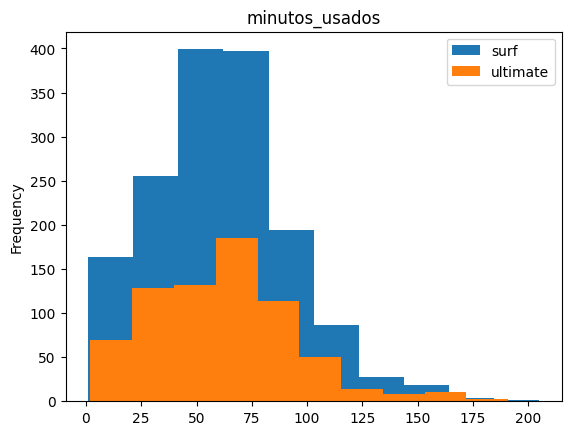

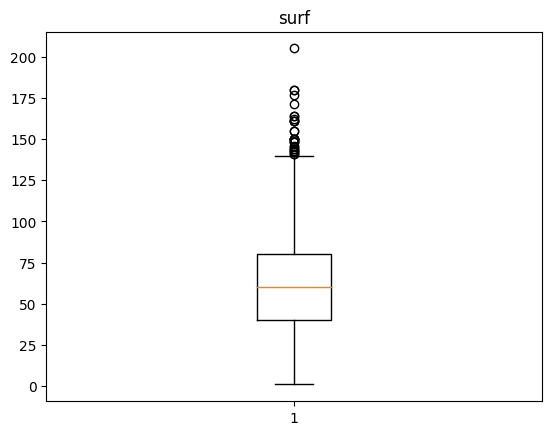

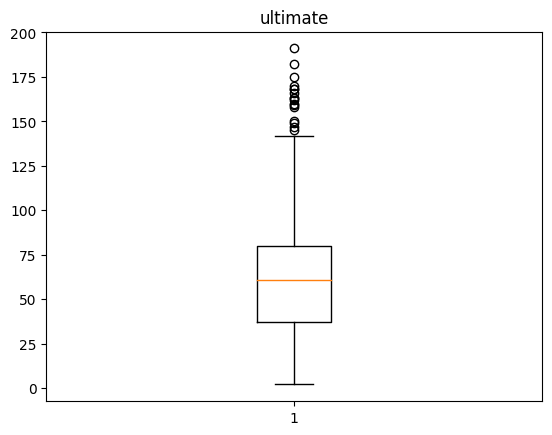

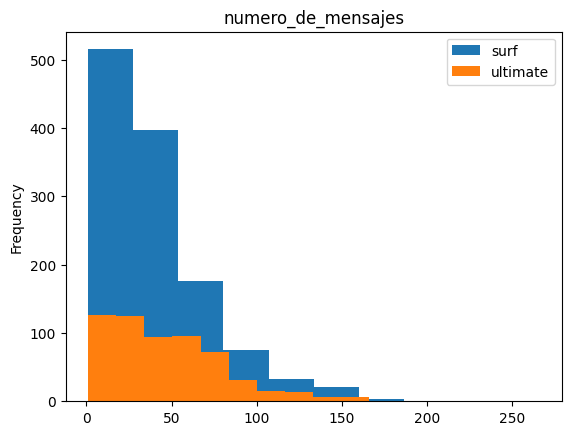

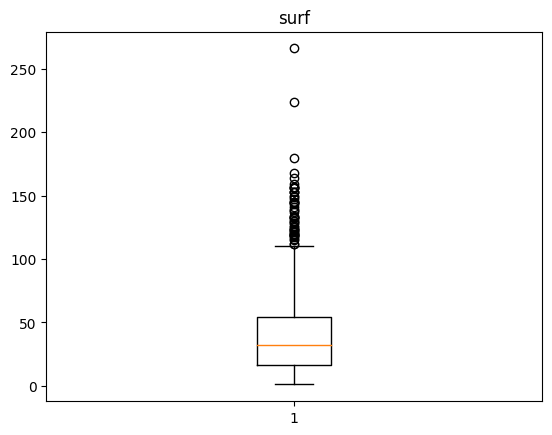

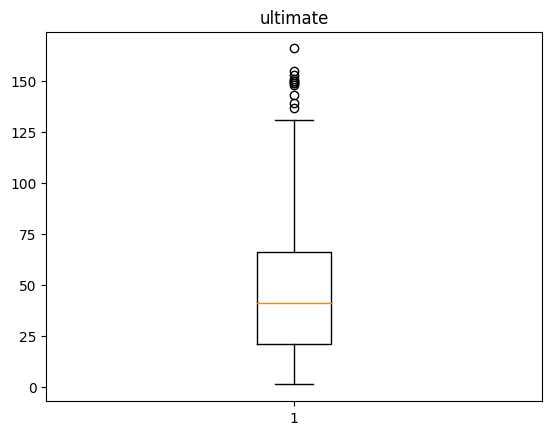

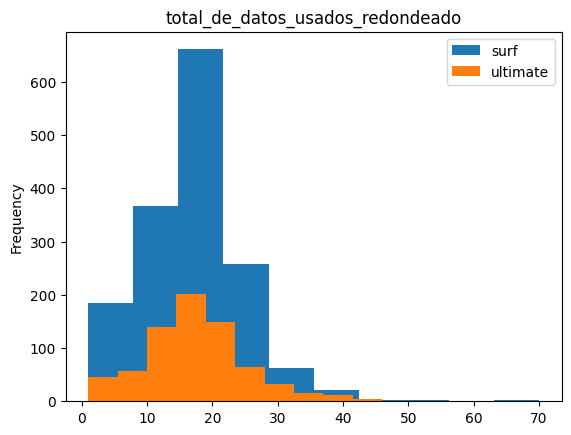

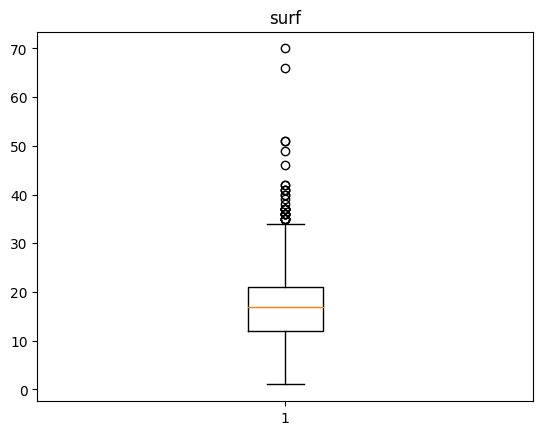

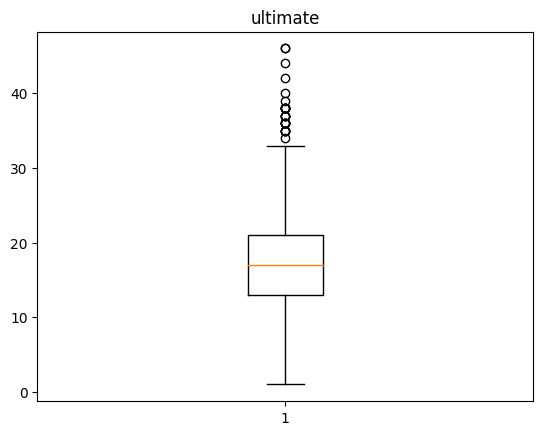

In [ ]:
import matplotlib.pyplot as plt

for metrica in variables:
    for plan in plans:
        tabla_de_consumo_planes[tabla_de_consumo_planes["plan_id"] == plan][metrica].plot(kind="hist")
                                
    plt.title(metrica)
    plt.legend(plans)
    plt.show()
    
    for plan in plans: 
        plt.boxplot(tabla_de_consumo_planes[tabla_de_consumo_planes["plan_id"] == plan][metrica].dropna())
        plt.title(plan)
        plt.show()

en la distribucion de uso de metrica y plan podemos concluir que el plan surf muestra un rango mas amplio de minutos usados
esto indica que los usuariosde este plan tienden a usar más minutos de manera más diversa en comparación con los usuarios del plan ultimate.
de igual forma es mas alto el numero de mensajes en "surf" Esto da a entender que el  plan ofrece más o mensajes y si los usuarios de un plan envían significativamente más mensajes que los de otro plan. llegando a los 500 mensajes mientras que ultimate llega a un poco  mas de 100 
el total de datos usados puede dar una idea de si un plan tiende a consumir más datos que otro y si hay una gran variabilidad en el consumo de datos entre los usuarios de cada plan.nuevamente siendo mas usado "surf" por mas de 600, aqui deberiamos evaluar muchos factores ya que surf puede ser por ejemplo mas rentable por precio o por calidad, por lo tanto a simple vista, podriamos ver que "surf" es mejor pero tendriamos que evaluar si en efecto es mejor 

In [ ]:
plans=["surf","ultimate"]

for plan in plans:
        rentabilidad = tabla_de_consumo_planes[tabla_de_consumo_planes["plan_id"] == plan] ["rentabilidad_mensual"].sum()
        print(f"la rentabiliad mensual del plan {plan} es de : {rentabilidad}")

la rentabiliad mensual del plan surf es de : 92710.93
la rentabiliad mensual del plan ultimate es de : 50680.0


## Prueba las hipótesis estadísticas

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis
alpha=0.05
sample_1 = tabla_de_consumo_planes.query("plan_id == 'surf'")["rentabilidad_mensual"]

In [ ]:
sample_1

1       20.00
2       20.00
3       90.09
4       60.00
5       60.00
        ...  
2295    20.00
2298    20.00
2299    20.00
2300    20.00
2302    20.00
Name: rentabilidad_mensual, Length: 1579, dtype: float64

In [ ]:
sample_2 = tabla_de_consumo_planes.query("plan_id == 'ultimate'")["rentabilidad_mensual"]

In [ ]:
sample_2

0       70.0
19      70.0
20      70.0
26      70.0
27      70.0
        ... 
2292    70.0
2293    70.0
2296    70.0
2297    70.0
2301    70.0
Name: rentabilidad_mensual, Length: 724, dtype: float64

In [ ]:
plans=["surf","ultimate"]

for plan in plans:
        rentabilidad_suma = tabla_de_consumo_planes[tabla_de_consumo_planes["plan_id"] == plan] ["rentabilidad_mensual"].sum()
        rentabilidad_promedio_mensual = tabla_de_consumo_planes[tabla_de_consumo_planes["plan_id"] == plan] ["rentabilidad_mensual"].mean()
        print(f"la rentabiliad mensual del plan {plan} es de : {rentabilidad_suma}")
        print(f"la rentabiliad mensual promedio del plan {plan} es de : {rentabilidad_promedio_mensual}")

la rentabiliad mensual del plan surf es de : 92710.93
la rentabiliad mensual promedio del plan surf es de : 58.714965167827735
la rentabiliad mensual del plan ultimate es de : 50680.0
la rentabiliad mensual promedio del plan ultimate es de : 70.0


podemos concluir que el plan Surf tiene una rentabilidad total mensual mayor que el plan Ultimate, lo que sugiere que, en total, genera más ingresos mensuales sin embargo, el plan Ultimate tiene una rentabilidad mensual promedio más alta, lo que indica que, en promedio, cada unidad o instancia de este plan es más rentable que el plan Surf. por tanto lo que general "ultimate" es mucho mayor que "surf"

h0= los promedios mensaules del plan surf son igaules al plan ultimate 
h0x=los promedios mensaules del plan surf tienen una varianza igual a la de plan ultimate

In [ ]:
from scipy import stats as st

resultados=st.ttest_ind(sample_1, sample_2, equal_var=False)
resultados_levene=st.levene(sample_1, sample_2)
print(f"p-value: {resultados.pvalue}")
print(f"p-value: {resultados_levene.pvalue}")


p-value: 3.925205457071692e-16
p-value: 1.0263728654244505e-97


/tmp/ipykernel_32/283607869.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  resultados=st.ttest_ind(sample_1, sample_2, equal_var=False)


In [ ]:
if resultados.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 1")
else:
    print("No podemos rechazar la hipotesis nula")

podemos rechazar la hipotesis nula 1


In [ ]:
if resultados_levene.pvalue < alpha:
    print("podemos rechazar la hipotesis nula 2")
else:
    print("No podemos rechazar la hipotesis nula")

podemos rechazar la hipotesis nula 2


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Al hacer las correcciones y agregar informacion que enriquesciera los datos trabajados se concluye que apesar de que estadisticamente en primera instancia pareciera que "surf" es un mejor plan que "ultimate" el valor promedio concluye que "ultimate" es mejor ya que una rentabilidad mensual mejor, realizan las pruebas de hipotesis con un alpha = 0.05 (esto para que permita aceptar un cierto margen de error) nos demuestra q

Hhacer las correcciones y agregar informacion que enriquesciera los datos como el crear una variable mes para tener una fecha mas especifica del uso de planes hacia los usuarios se concluye que apesar de que estadisticamente en primera instancia pareciera que "surf" es un mejor plan que "ultimate" que es la forma en que lo muestra los graficos y las cajas de dispercion
El plan "surf" genera una rentabilidad mensual total mayor que el plan "ultimate". Esto sugiere que, en términos absolutos, el plan "surf" es más rentable que el plan "ultimate". sin embrago La rentabilidad mensual promedio es de aproximadamente 58.71. mientras que Plan Ultimate La rentabilidad mensual promedio es de 70.00 es por esto que: 
AUnque el plan "surf" tiene una rentabilidad total mayor, el plan "ultimate" tiene una rentabilidad mensual promedio más alta. Esto indica que, en promedio, cada instancia del plan "ultimate" genera más rentabilidad por mes que cada instancia del plan "surf".
#En resumen, mientras que el plan "surf" genera más rentabilidad total, el plan "ultimate" ofrece una rentabilidad promedio superior. Esto puede influir en decisiones sobre cómo gestionar y promocionar cada plan para optimizar tanto la rentabilidad total como la rentabilidad promedio.